In [1]:
import numpy as np
import tensorflow as tf 
import sys
import os

import dotenv
import os
from dotenv import load_dotenv, find_dotenv
sys.path.append(os.getenv('src_dir'))


In [2]:

from src.models.model_arcitectures._model_quantile_simp import quantile_model
from src.models.model_arcitectures._model_quantule_v2 import quantile_model as qmodel_v2
from src.models.model import Model
from src.models._util import seed_everything
from src.analyse_model.analyse import Analyse_model
from src.analyse_model.visualize import *

In [3]:

initi()

# Loading Data

In [4]:
dataset = np.load('../data/processed/train_test_ratiocleaned_szcore_minmax.npz',allow_pickle=True)
scale = [dataset['minimum_values'],
                     dataset['metadata_training_minimum_values'],
                     dataset['minimum_values_targets'],
                     dataset['maximum_values'],
                     dataset['metadata_training_maximum_values'],
                     dataset['maximum_values_targets'],
                    
                    dataset['img_mean'],
                     dataset['metadata_mean'],
                     dataset['targets_mean'],
                     dataset['img_std'],
                     dataset['metadata_std'],
                     dataset['targets_std']]

# Loading Model

In [5]:
with Model() as M:
    M.data_load(dataset["imgs_training_clipped_scaled"],dataset["metadata_training_scaled"],dataset["targets_training_scaled"])
    M.model_load(which_model='quantile_model_v2')
    M.model.model.load_weights('../models/quantile_v2/weights_lowest_loss_quantile_v2.h5')

1Metal device set to:  Physical GPUs, 1 Logical GPUs
Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-09-29 12:09:21.965733: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-29 12:09:21.965881: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
1 Physical GPUs, 1 Logical GPUs
maxCacheSize: 24.00 GB



2022-09-26 22:17:41.916325: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-26 22:17:41.916669: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Analysing results

In [6]:
with Analyse_model(M.model.model) as anal:
    anal.get_data(
        [
            dataset["imgs_testing_clipped_scaled"],
            dataset["metadata_testing_scaled"],
            dataset["targets_testing_scaled"],
        ]
    )
    anal.get_scaling(scale)
    anal.inverse_values()
    anal.all_estimates_inverse()


2022-09-29 12:09:35.867421: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-09-29 12:09:35.934243: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


252/252 [==============================] - 19s 70ms/step


In [7]:
anal.accuracy()
anal.confidence_intervals()

In [8]:
ci_index = np.argsort(anal.length_99CI)

True length: 222     
Estimated length:235 [214,255]            
True width: 36             
Estimated width:37 [32,42]


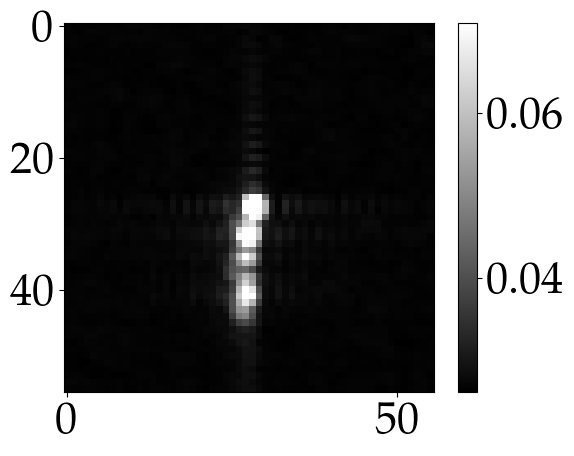

In [9]:
ix = ci_index[2]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 258     
Estimated length:271 [191,311]            
True width: 39             
Estimated width:38 [32,43]


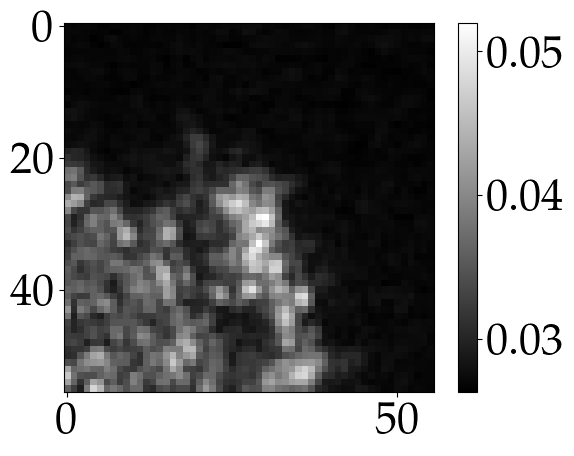

In [10]:
ix = ci_index[-2]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 269     
Estimated length:275 [195,319]            
True width: 41             
Estimated width:39 [32,44]


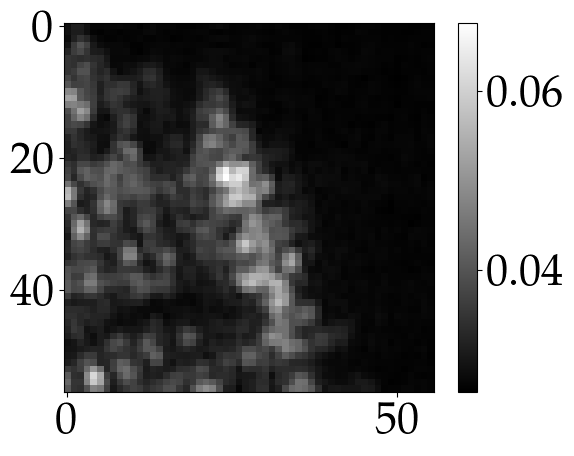

In [11]:
ix = ci_index[-1]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 262     
Estimated length:264 [198,313]            
True width: 39             
Estimated width:38 [31,42]


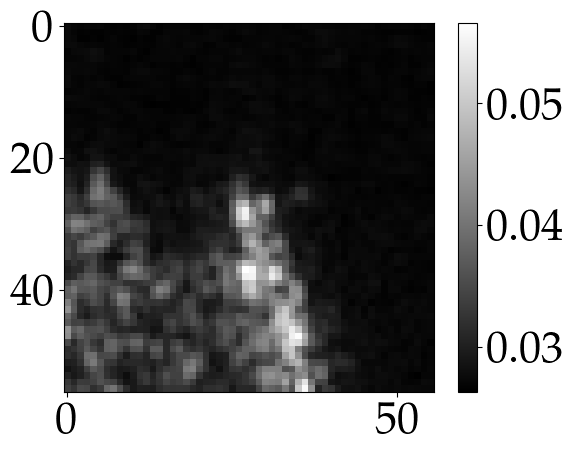

In [12]:
ix = ci_index[-3]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 248     
Estimated length:270 [206,321]            
True width: 38             
Estimated width:38 [32,42]


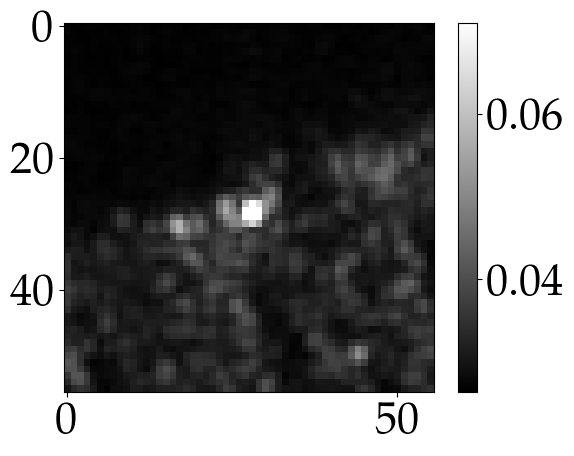

In [13]:
ix = ci_index[-4]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 229     
Estimated length:231 [194,240]            
True width: 39             
Estimated width:39 [29,40]


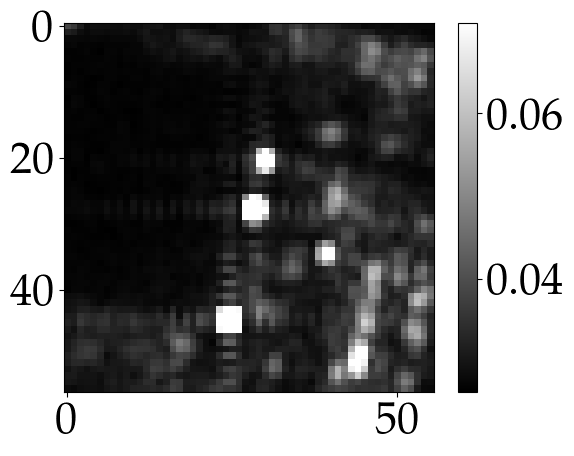

In [14]:
ix = ci_index[4]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 235     
Estimated length:236 [213,260]            
True width: 38             
Estimated width:38 [32,42]


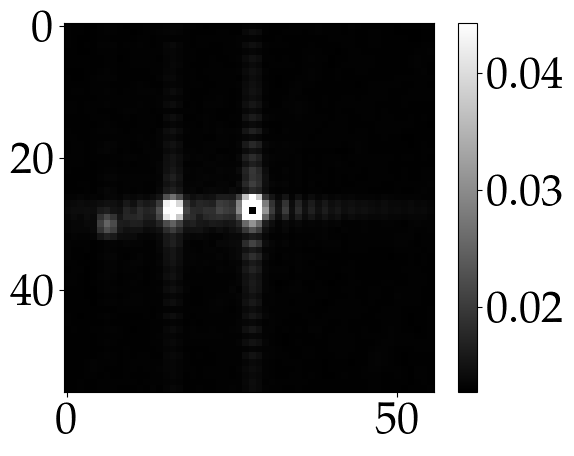

In [15]:
ix = ci_index[8]
single_ship_co(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 235     
Estimated length:236 [213,260]            
True width: 38             
Estimated width:38 [32,42]


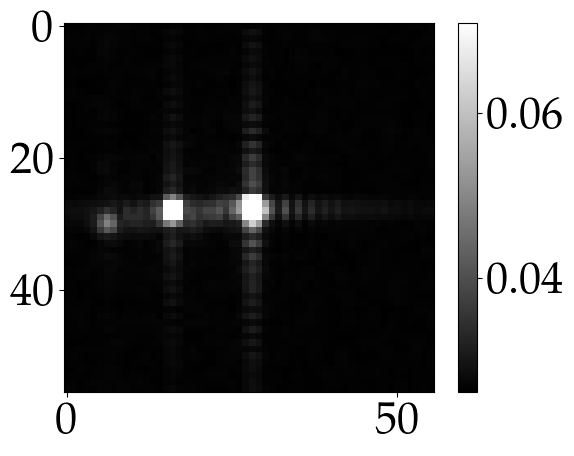

In [16]:
ix = ci_index[8]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

In [17]:
unique, counts = np.unique(anal.mmsi, return_counts=True)
mmsi_index = np.argsort(counts)


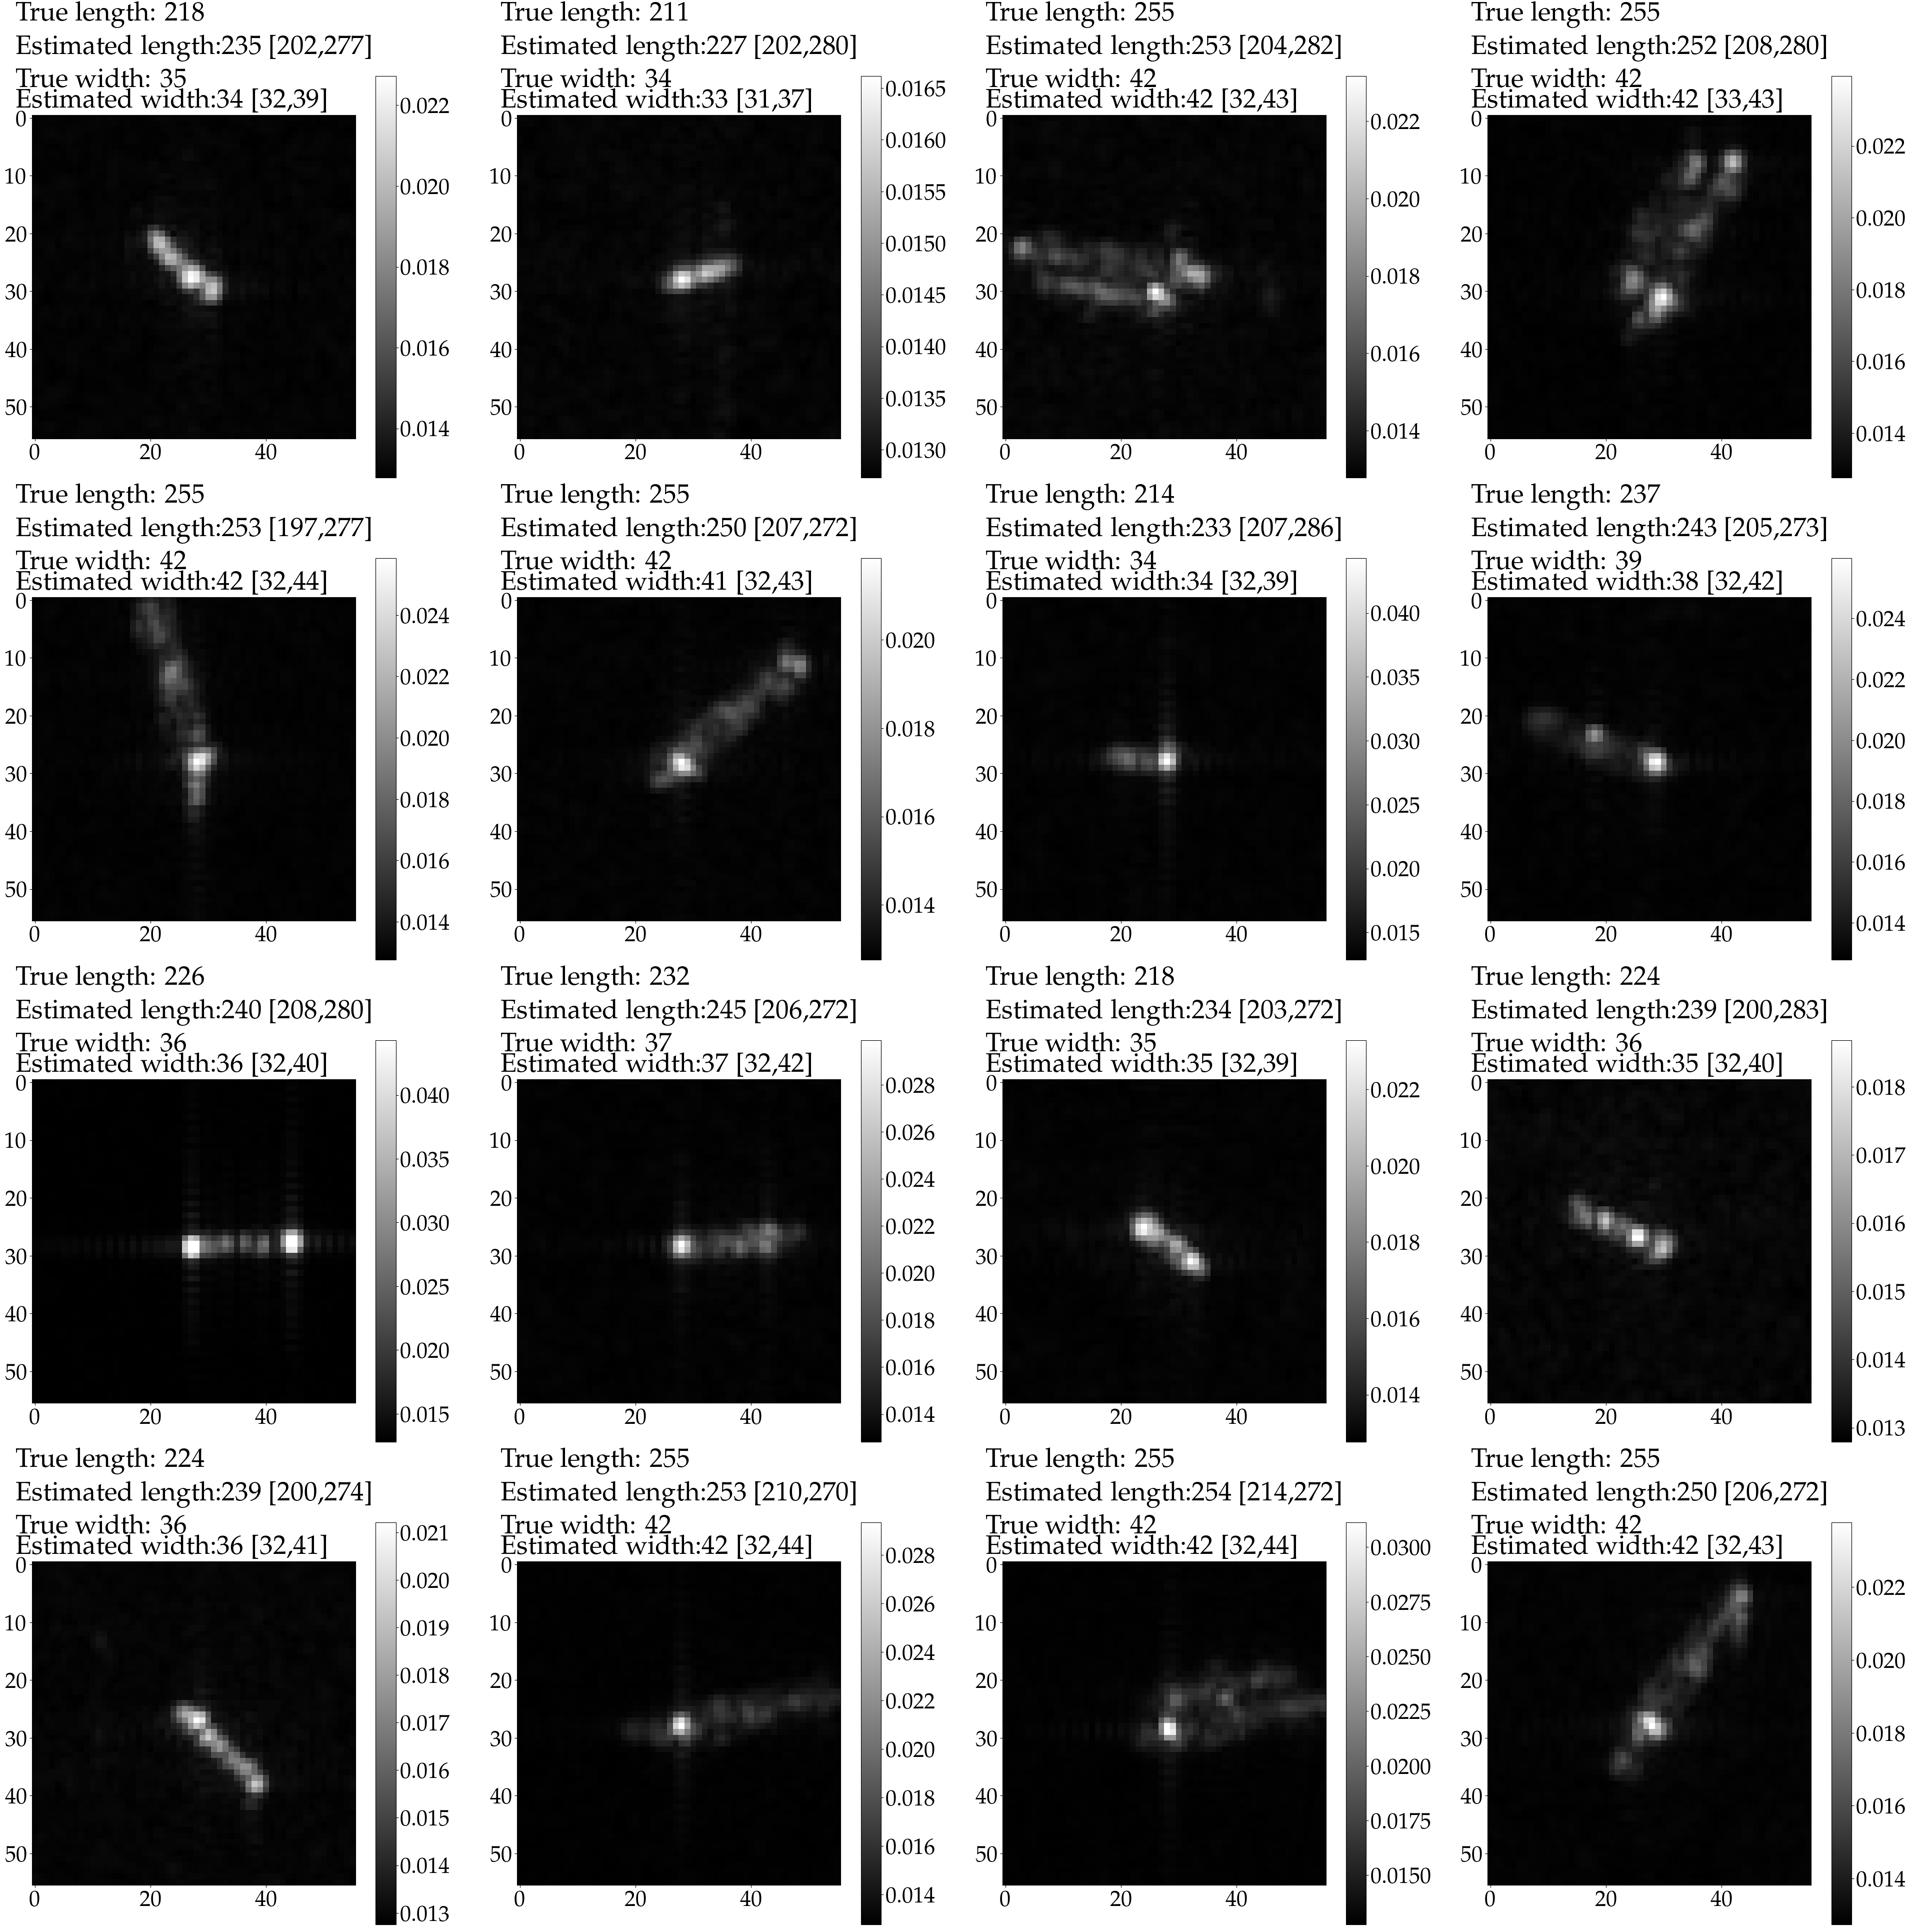

In [18]:
idx_same_ship = np.where(anal.mmsi==unique[mmsi_index[-10]])[0]

k = 1
plt.figure(figsize=(48,48))
for _ in range(16):
    plt.subplot(4,4,k)
    ix = idx_same_ship[k]
    plt.imshow(anal.images[ix,:, :, 0], cmap='gray')
    plt.colorbar()
    plt.title(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

    k = k+1


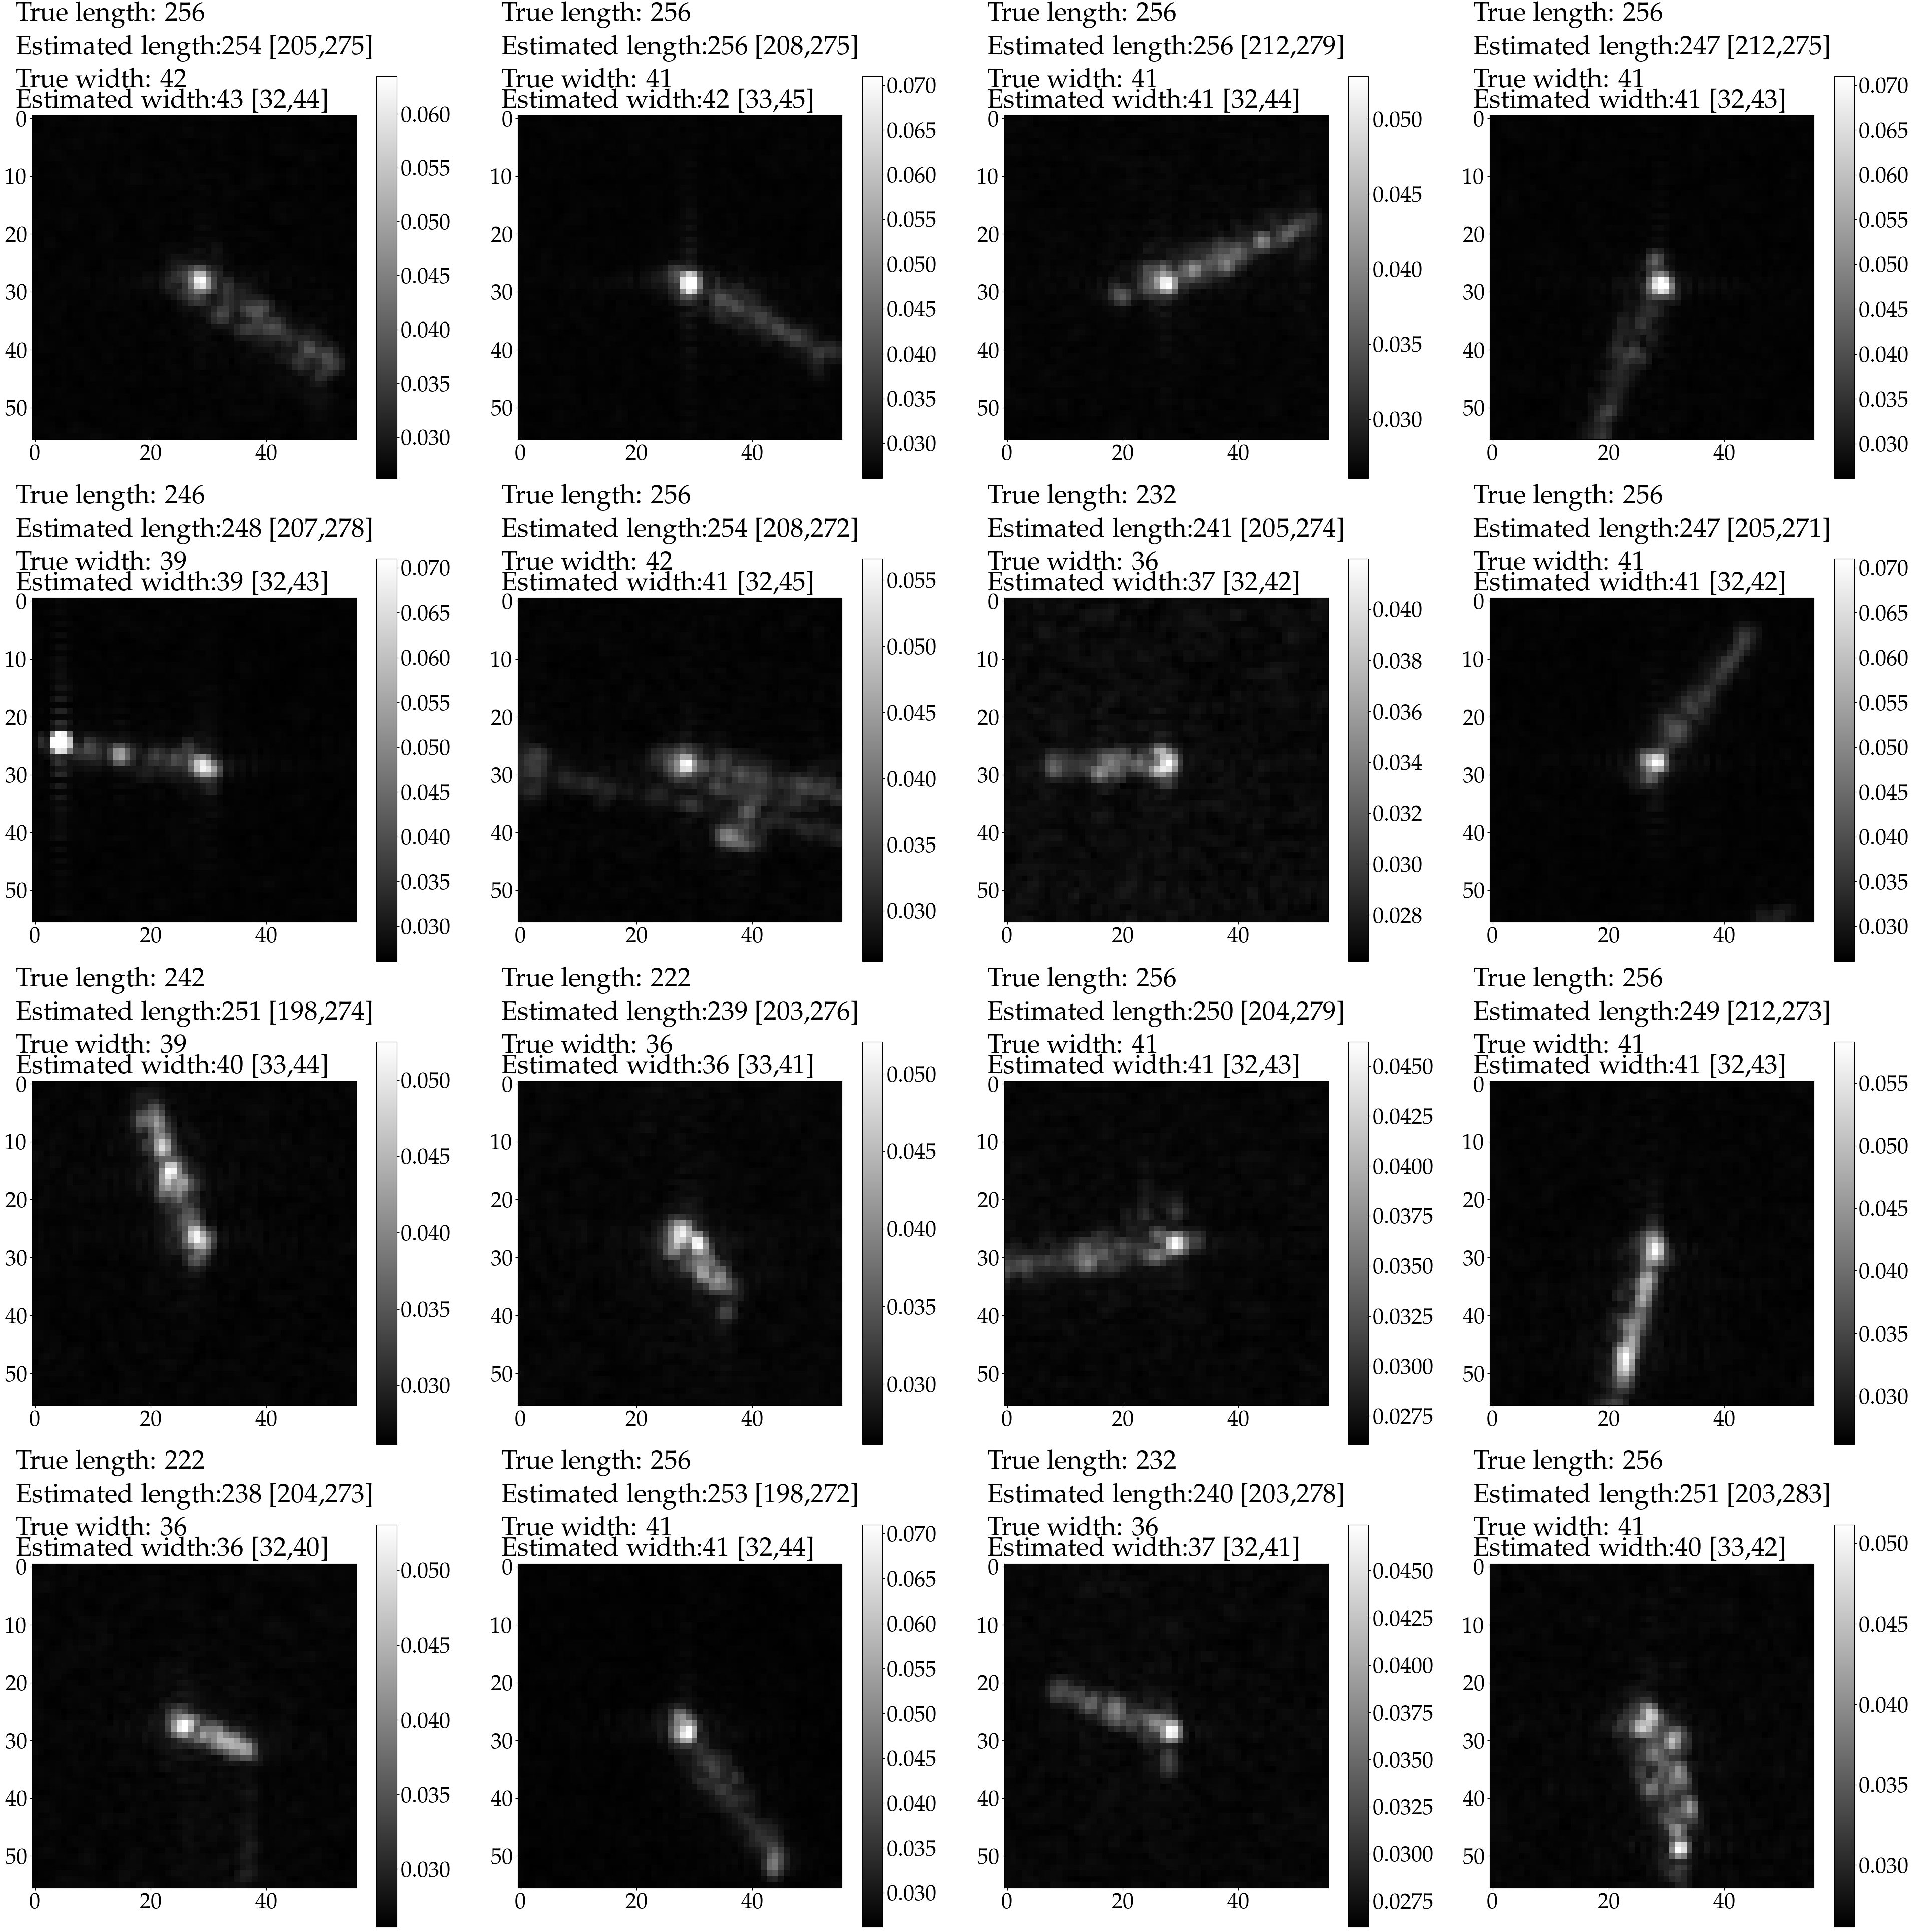

In [19]:
idx_same_ship = np.where(anal.mmsi==unique[mmsi_index[-5]])[0]

k = 1
plt.figure(figsize=(48,48))
for _ in range(16):
    plt.subplot(4,4,k)
    ix = idx_same_ship[k]
    plt.imshow(anal.images[ix,:, :, 1], cmap='gray')
    plt.colorbar()
    plt.title(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

    k = k+1


True length: 256     
Estimated length:256 [210,273]            
True width: 41             
Estimated width:41 [33,45]


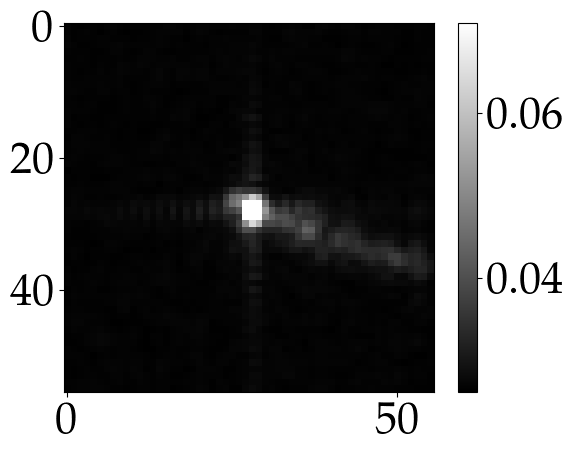

In [20]:
ix = idx_same_ship[0]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 256     
Estimated length:254 [205,275]            
True width: 42             
Estimated width:43 [32,44]


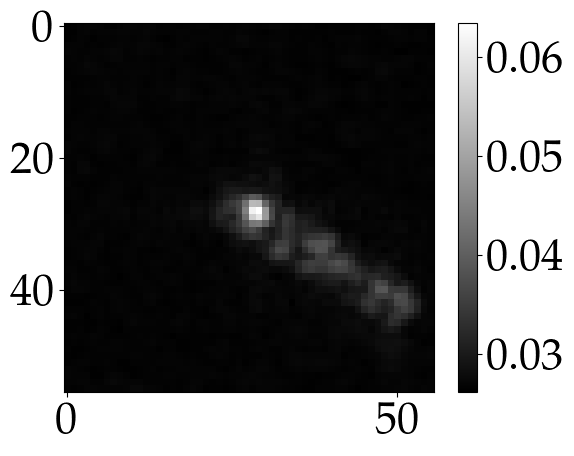

In [21]:
ix = idx_same_ship[1]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

True length: 256     
Estimated length:256 [208,275]            
True width: 41             
Estimated width:42 [33,45]


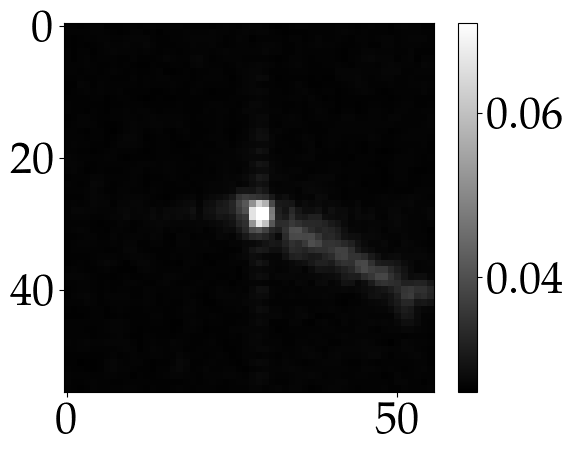

In [22]:
ix = idx_same_ship[2]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

In [23]:
anal.abs_errors()

In [24]:

abs_error_index = np.argsort(anal.length_errors_q50)

True length: 256     
Estimated length:256 [200,284]            
True width: 42             
Estimated width:43 [32,43]


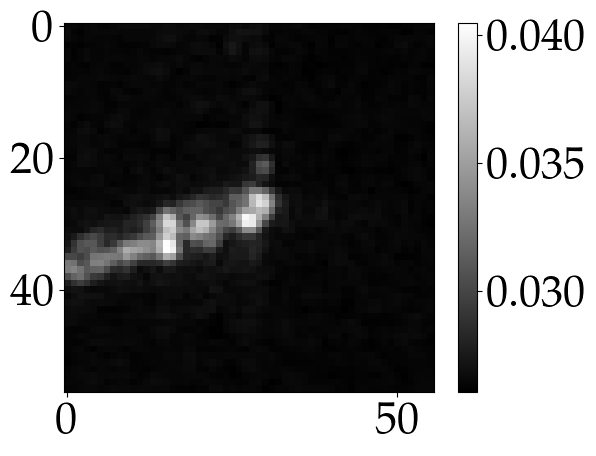

In [25]:
ix = abs_error_index[1]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

In [26]:
both_error_index = np.argsort(anal.normalized_erros)

True length: 255     
Estimated length:255 [208,278]            
True width: 42             
Estimated width:42 [32,44]


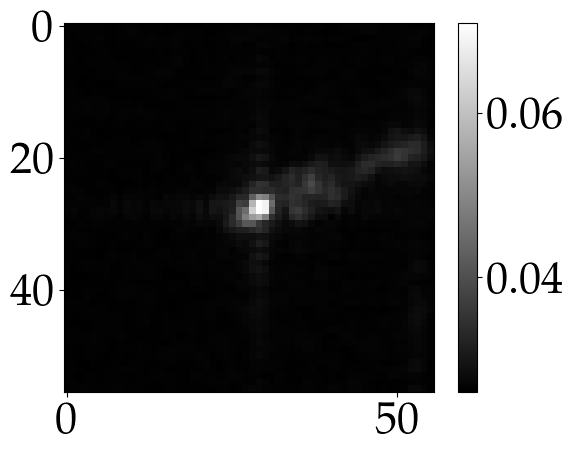

In [27]:
ix = both_error_index[2]
single_ship_cross(anal.images[ix])
print(f'True length: {anal.true_lengths[ix]} \
    \nEstimated length:{anal.predicted_length_inv_q50[ix]} [{anal.predicted_length_inv_q01[ix]},{anal.predicted_length_inv_q99[ix]}]\
            \nTrue width: {anal.true_widths[ix]}\
             \nEstimated width:{anal.predicted_width_inv_q50[ix]} [{anal.predicted_width_inv_q01[ix]},{anal.predicted_width_inv_q99[ix]}]')

../coding
